In [202]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

#matplotlib显示中文字符的方法请自行百度
#默认参数的代码请自行百度

%matplotlib inline

In [203]:
#拿来测试的数据
lst = ['Amy' ,'Bob', 'Cat', 'Dog', 'Eve', 'Fox', 'Gil', 'Hat']
var_df = pd.DataFrame(np.random.choice(lst,size=100), columns = ['name'])\
        .join(pd.DataFrame(np.random.randint(50,100,size=(100,5)), columns = ['str','def','int','pow','agl']))

In [204]:
var_df.head()

,name,str,def,int,pow,agl
0,Cat,59,90,54,91,51
1,Cat,92,60,64,59,74
2,Hat,92,85,66,61,50
3,Cat,75,64,61,72,62
4,Eve,70,90,81,62,75


In [205]:
var_df.groupby('name').sum().sum(axis = 1)

name
Amy    6761
Bob    2855
Cat    5130
Dog    4922
Eve    3322
Fox    5016
Gil    4494
Hat    4875
dtype: int64

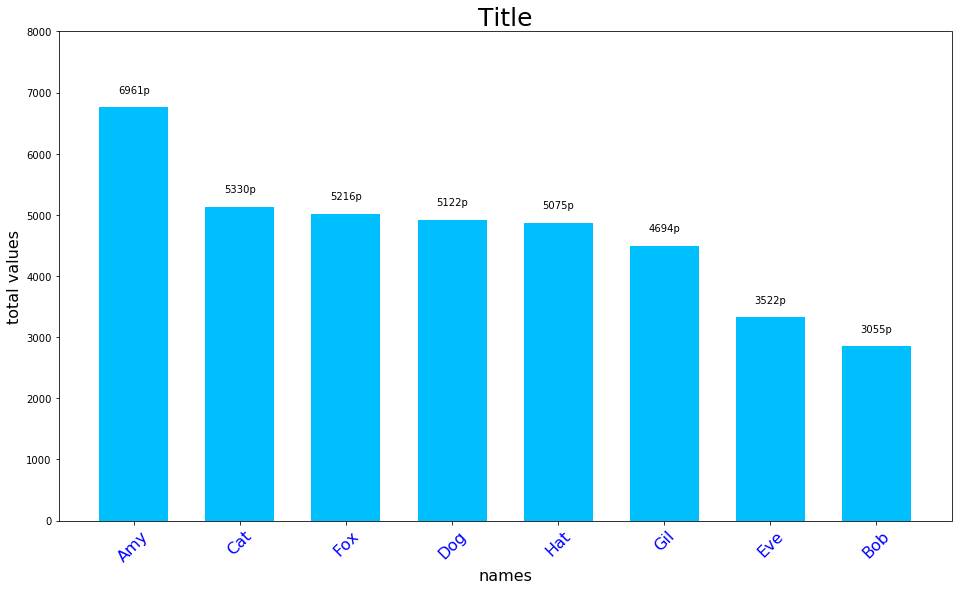

In [206]:
#单个条形图的画法
def bar():
    #定义需要画图的数据，bar图需要一维数组，要带标签最好用df格式
    var = var_df.groupby('name').sum().sum(axis = 1).sort_values(ascending = False)
    #建立一个长度为bar组数的排序序号，位置序号是0,1,2,3……的格式，很多地方能用上
    var_array = np.arange(len(var))
    #初始化主图和子图对象和主图width x height = 16 x 9
    fig, ax = plt.subplots(figsize = (16,9)) 
    #设置子图属性
    ax.set_xlabel('names', fontsize = 16)    #x轴标签
    ax.set_ylabel('total values', fontsize = 16)    #y轴标签
    ax.set_title('Title', fontsize = 25)    #标题
    #建立bar对象，第一个是bar的位置顺序序号，第二个是对应每个bar的数据，width是var的宽度，color颜色具体可以百度
    ax.bar(var_array, var, width = 0.65, color = 'deepskyblue') 
    ax.set_ylim([0, 8000])    #可以选择设置y轴的刻度
    
    #用plt.setp函数对ax进行参数设置，这个方法可以设置matplotlib的大部分对象
    #xtick是x轴的刻度位置序号，xticklabel是对应要写进去的标签
    plt.setp(ax, xticks = var_array, xticklabels = list(var.index))
    #同理可以利用get_xticklabel取出xticklabels对象，get_xxxx还有什么请自行百度
    labels = ax.get_xticklabels()
    #rotation是文本的倾斜度
    plt.setp(labels, rotation = 45, fontsize = 16, color = 'blue')
    
    #可以在图中利用text写文档，不需要的可以忽略
    #x轴的位置，可以利用向量化或其他方法计算
    xpos = var_array
    #y轴的位置
    ypos = list(var + 200)
    #利用loop写入每一个文本
    for pos in range(len(var)):
        #第一、二个是x，y轴的位置，第三个是要写进去的字符串，ha是设置位置居中对齐，va是设置底对齐
        ax.text(xpos[pos], ypos[pos], str(ypos[pos]) + 'p', ha = 'center', va = 'bottom', rotation = 0)
    plt.show()
    
bar()

In [207]:
var_df.groupby('name').sum()[['str','int']]

,str,int
name,,
Amy,1368,1404
Bob,569,562
Cat,1003,1042
Dog,927,1011
Eve,630,625
Fox,1025,968
Gil,900,884
Hat,1022,947


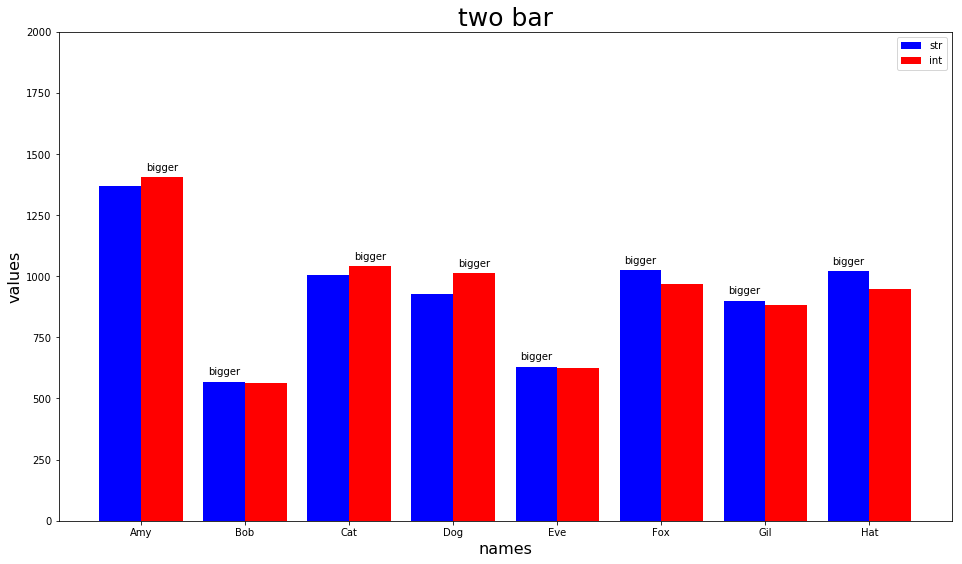

In [208]:
#多个bar图的画法
def two_bar():
    #如果想画两组bar就需要两组数据
    var1 = var_df.groupby('name').sum()['str']
    var2 = var_df.groupby('name').sum()['int']
    #建立一个长度为bar组数的排序序号，很多地方能用上
    var_array = np.arange(len(var1))
    
    #初始化图形和子图对象
    fig, ax = plt.subplots(figsize = (16,9)) 
    #设置子图属性
    ax.set_ylim([0,2000])
    ax.set_xlabel('names',fontsize=16)
    ax.set_ylabel('values',fontsize=16)
    ax.set_title('two bar',fontsize=25)
    
    #建立两个条形图对象，注意要设置好宽度width以及利用向量化计算好两个bar在x轴的位置，不然会重合
    ax.bar(var_array, var1, width = 0.4, color = 'b', label = 'str')
    ax.bar(var_array + 0.4, var2, width = 0.4, color = 'r', label = 'int')
    #设置x轴的标签属性
    plt.setp(ax, xticks = var_array + 0.2, xticklabels = list(var1.index))
    
    #在图中写文档，怎么找对位置自己多试试
    xpos = var_array + 0.4
    ypos = list(var2 + 20)
    i = 0 
    while i < len(var2):
        if var1[i] > var2[i]:
            ypos[i] = var1[i] + 20
            xpos[i] = xpos[i] - 0.4
        i = i + 1
    for pos in var_array:
        ax.text(xpos[pos], ypos[pos], 'bigger', ha = 'center', va = 'bottom')
    
    #有在bar里设置label的可以默认，也可以自己画，比如
    #legend = ['str', 'int']
    #ax.legend(legend, ncol = 2, loc = (0.1,0.9))     #ncol是列数，loc是位置，默认loc = 0是自适应在右上角
    ax.legend()
    plt.show()
    
two_bar()

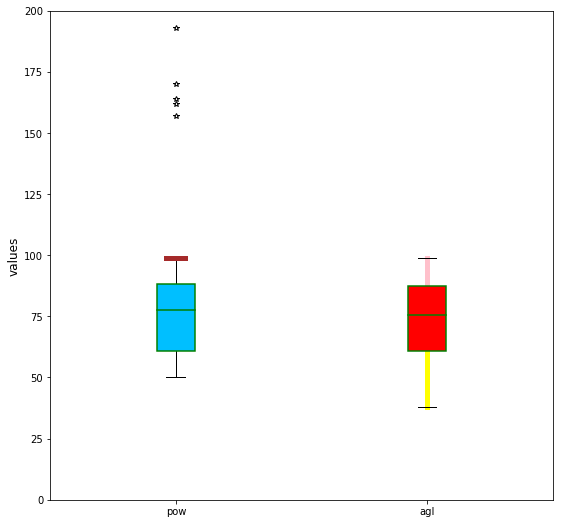

In [209]:
#画多个箱线图
def two_boxplot():
    #设置两个箱线图的数据
    var1 = var_df['pow'].copy()
    var2 = var_df['agl'].copy()
    #加点异常点示例
    var1[4:9] += 100  
    var2[12:15] -= 50
    
    #初始化
    fig = plt.figure(figsize = (9,9))
    ax = fig.add_subplot(111)
    #设置箱线图属性
    #注意patch_artist要赋值True，才能填充颜色
    boxplt = ax.boxplot([var1, var2],  patch_artist = True)  
    ax.set_ylabel('values', fontsize = 12)
    ax.set_ylim([0, 200])
    plt.setp(ax, xticklabels = ['pow', 'agl'])
    
    #以下是修改箱体各组成部分颜色和线条的方法，箱线图的结构有点不同，具体自己体会，这里['boxes']是箱体、['medians']是中位线等等
    #还有很多参数自己边百度边试试
    #这种格式可以多利用loop合并处理，比如
    for part in ['medians', 'boxes']:
        for box in boxplt[part]:
            box.set(color = 'green', linewidth = 1.5)
    #boxes的set(facecolor)设置箱体填充颜色，要放在color后面才能覆盖
    #[0]、[1]、[2]等分别对应箱线图各部位的序号位置，多个箱线图是按顺序排列的，具体自己试试
    boxplt['boxes'][0].set(facecolor = 'deepskyblue')
    boxplt['boxes'][1].set(facecolor = 'r')
    boxplt['caps'][1].set(color = 'brown', linewidth = 5)
    boxplt['whiskers'][2].set(color = 'yellow', linewidth = 5)
    boxplt['whiskers'][3].set(color = 'pink', linewidth = 5)
    boxplt['fliers'][0].set(marker = '*')
    boxplt['fliers'][1].set(marker = '^')
    plt.show()

two_boxplot()

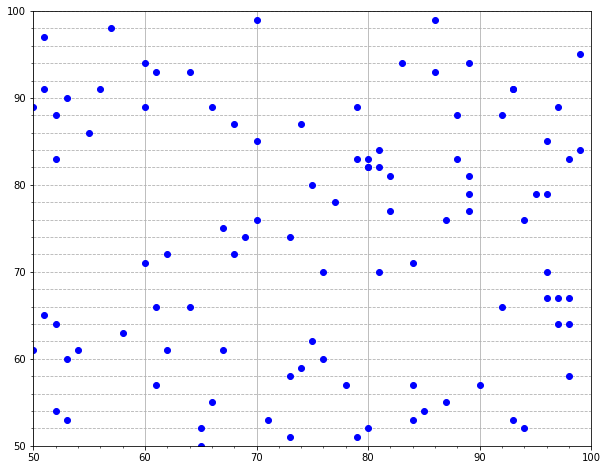

In [210]:
#画散点图
def scattergram():
    #两个数组，一个x坐标，一个y坐标即可
    var1 = var_df['agl']
    var2 = var_df['pow']
    fig, ax = plt.subplots(figsize = (10,8)) 
    ax.plot(var1, var2, 'o',color = 'b')
    ax.axis([50, 100, 50, 100])
    #默认x、y轴的次刻度，可以用其他方法自行设置，具体百度
    plt.minorticks_on()
    #主刻度网格
    ax.xaxis.grid(True, which='major', linestyle = '-')
    ax.yaxis.grid(True, which='major', linestyle = '--')
    #次刻度网格
    ax.yaxis.grid(True, which='minor', linestyle = 'dashed')
    plt.show()
    
scattergram()

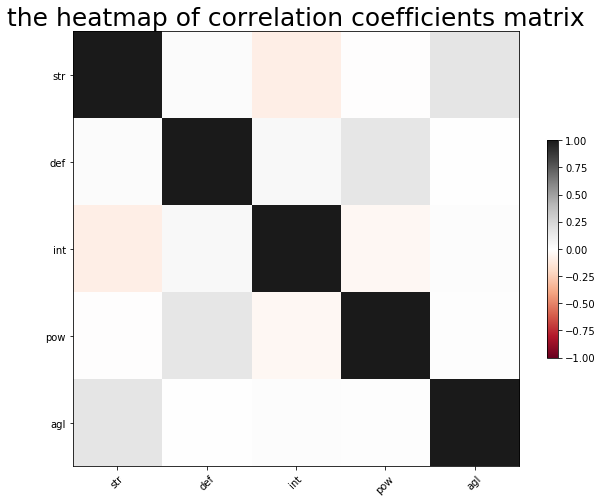

In [211]:
#画相关性热图
def heatmap():
    #相关性矩阵
    matrix = var_df.corr()
    #imshow函数对numpy.float64格式报错，所以需要转换成float
    def turnfloat(x):
        return np.float64(x).item()
    var = matrix.applymap(turnfloat)
    #labels为x,y轴标签
    labels = list(matrix.columns)
    #初始化色图对象，'RdGy'是调色板名称，1000是粒度
    #调色板可以参考https://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps
    cmap = cm.get_cmap('RdGy',1000)
    fig, ax = plt.subplots(figsize = (10,8)) 
    #设置x、y轴标签
    ax.set_yticks(np.arange(0, len(labels)))  
    ax.set_yticklabels(labels)  
    ax.set_xticks(np.arange(0, len(labels)))  
    ax.set_xticklabels(labels, rotation = 45)
    ax.set_title('the heatmap of correlation coefficients matrix', fontsize = 25)
    #利用imshow建立矩阵置换成热图对象，由于相关性是-1到1，所以色条最小值和最大值取-1和1
    map = ax.imshow(var, interpolation = 'nearest', cmap = cmap, aspect = 'auto', vmin = -1, vmax = 1) 
    #设置色条的属性，shrink是缩放
    cb = plt.colorbar(mappable = map, cax = None, ax = None, shrink = 0.5)  
    plt.show()
    
heatmap()

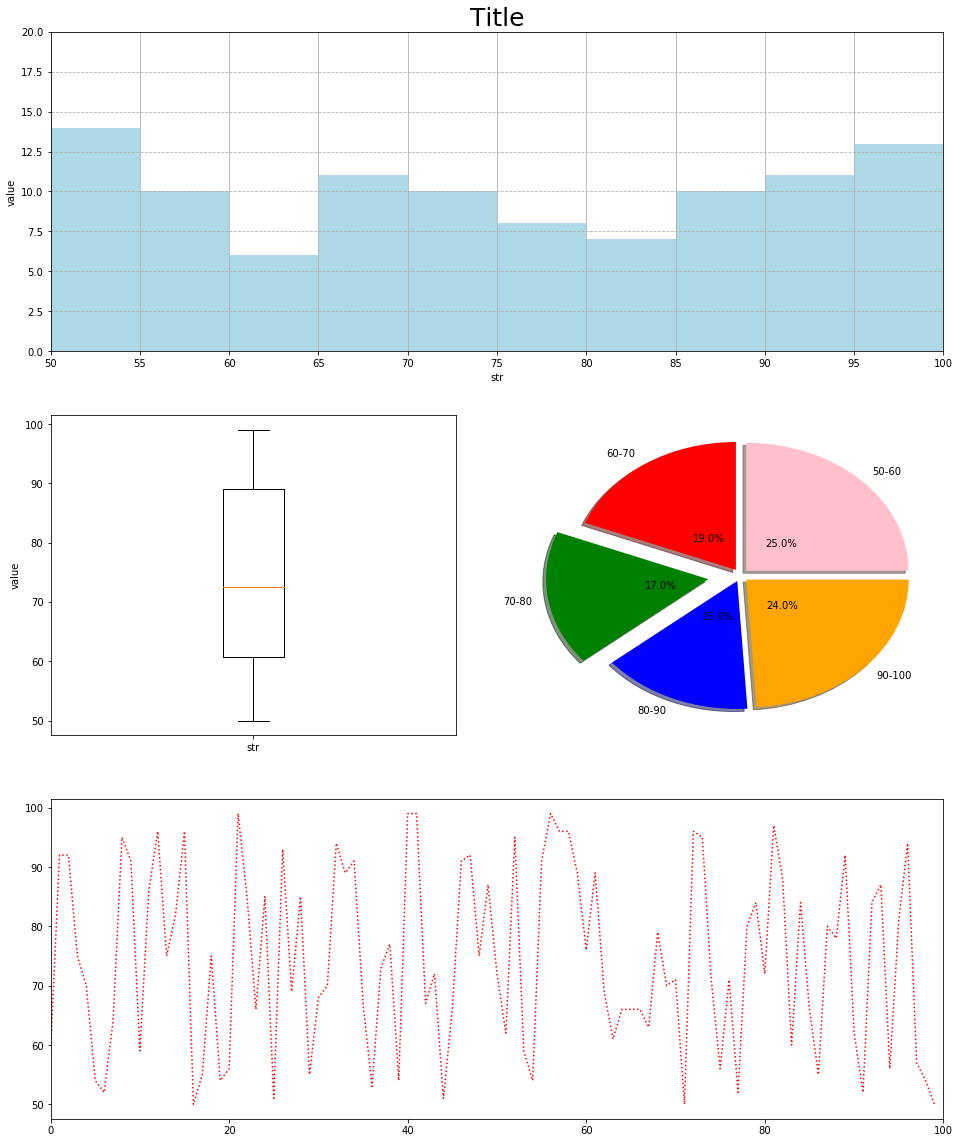

In [212]:
#多子图的画法
def mutiple_subplots():
    #直方图、箱线图和折线图的图示数据
    var = var_df['str']
    #饼状图的各块的分组数据,50-60,60-70,70-80,80-90,90-100
    var_pie = []
    var_pie.append(len(var[var <= 60]))
    var_pie.append(len(var[var <= 70]) - len(var[var <= 60]))
    var_pie.append(len(var[var <= 80]) - len(var[var <= 70]))
    var_pie.append(len(var[var <= 90]) - len(var[var <= 80]))
    var_pie.append(len(var) - len(var[var <= 90])) 
    #初始化图形和各子图对象
    fig = plt.figure(figsize = (16,20))
    #子图位置，比如311是行x列3x1的第一个的位置，323是3x2从左到右从上到下第3个的位置
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(323)
    ax3 = fig.add_subplot(324)
    ax4 = fig.add_subplot(313)
    #设置简单一个数组的直方图，bins取整数就是bar的数量，取array可以设置组宽，二项分布结构具体百度
    ax1.hist(var, bins = np.arange(50, 100 + 1, 5), histtype = 'bar', facecolor = 'lightblue')
    ax1.axis([50,100,0,20])    #可以一并设置x、y轴刻度，比如x轴50-100，y轴0-20
    ax1.set_title('Title', fontsize = 25)
    ax1.set_ylabel('value')
    ax1.set_xlabel('str')
    ax1.set_xticks(np.arange(50, 100 + 1, 5))    #x轴的刻度
    #网格
    ax1.xaxis.grid(True, which='major', linestyle = '-')
    ax1.yaxis.grid(True, which='major', linestyle = '--')
    #设置箱线图
    ax2.boxplot(var)
    ax2.set_xticklabels(['str'])
    ax2.set_ylabel('value')
    #设置饼状图
    ax3.pie(var_pie,
            explode = [0.05,0.05,0.2,0.05,0.05],    #饼块离开中心的距离
            colors = ['pink','red','green','blue','orange'],    #颜色，饼块的顺序默认从3点开始逆时针
            labels = ['50-60', '60-70', '70-80', '80-90', '90-100'],    #标签
            labeldistance = 1.1, #标签的距离
            shadow = True,
            pctdistance = 0.3, # 百分比到中心的距离
            autopct = '%1.1f%%')   #百分比的格式
    #设置折线图，第一二个分别是x,y轴，linestyle默认solid
    ax4.plot(range(len(var)), var , color = 'r', linestyle = 'dotted')
    ax4.set_xlim([0,100])
    plt.show()  
    
mutiple_subplots()